# Naive Bayes

## Imports

In [34]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.dummy import DummyClassifier
from sklearn.utils import resample
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted
from sklearn.utils.multiclass import unique_labels
from sklearn.utils.estimator_checks import check_estimator
import pandas as pd
import seaborn as sns
import numpy as np

## Load data

In [2]:
df=pd.read_csv('data/dataset.csv')
df = df[df['genre'].notnull()]
df.head(5)

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,...,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target,decade,genre
1,Initials B.B.,Serge Gainsbourg,spotify:track:5hjsmSnUefdUqzsDogisiX,0.498,0.505,3,-12.475,1,0.0337,0.0180,...,0.1760,0.797,101.801,213613,4,48.82510,10,0,60,pop
6,Samba De Uma Nota So (One Note Samba),Antônio Carlos Jobim,spotify:track:62eoocmGk59EMfuRcLBvUL,0.662,0.272,0,-18.883,1,0.0313,0.3600,...,0.0963,0.591,143.507,134360,4,47.82155,7,0,60,jazz
9,I Can Hear Music,The Beach Boys,spotify:track:1hcMfYTsRTC4hIKbfosxjz,0.511,0.603,2,-7.637,1,0.0280,0.0385,...,0.1420,0.685,128.336,157293,4,43.36534,9,1,60,pop
11,Ride Away,Roy Orbison,spotify:track:1nxSCulSg5AtmExqgHPPC0,0.520,0.411,9,-12.411,1,0.0315,0.7860,...,0.1460,0.350,120.290,207573,4,37.54527,9,1,60,pop
13,P.T. 109,Jimmy Dean,spotify:track:3vfNUZeVUiwWXwsEXjagqL,0.746,0.666,2,-10.408,1,0.1460,0.5430,...,0.0488,0.840,94.024,192427,4,78.59848,5,1,60,country


## Helper functions

In [3]:
def plot_heatmap(model, X_test, y_test, le_genre):
    y_predict = model.predict(X_test)
    conf_matrix_nb=pd.crosstab(
        le_genre.inverse_transform(y_test),
        le_genre.inverse_transform(y_predict),
        rownames=['Actual'],
        colnames=['Predicted']
    )
    sns.heatmap(conf_matrix_nb)

In [4]:
def encode_df(df, le_decade, le_genre):
    df_encoded = df[
        ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
         'instrumentalness', 'acousticness', 'liveness', 'valence', 'tempo',
         'duration_ms', 'chorus_hit', 'decade', 'genre']
    ].copy()
    df_encoded['n_decade'] = le_decade.transform(df_encoded['decade'])
    df_encoded['n_genre'] = le_genre.transform(df_encoded['genre'])
    df_encoded = df_encoded.drop(['genre', 'decade'], axis=1)
    return df_encoded

In [5]:
def split(df):
    return train_test_split(df.drop('n_genre', axis=1), df['n_genre'])

In [22]:
def fit_summary(model, df):
    le_decade = LabelEncoder()
    le_decade.fit(df.decade)
    le_genre = LabelEncoder()
    le_genre.fit(df.genre)
    df_encoded = encode_df(df, le_decade, le_genre)
    X_train, X_test, y_train, y_test = split(df_encoded)
    model.fit(X_train, y_train)
    plot_heatmap(model, X_test, y_test, le_genre)
    score = model.score(X_test, y_test)
    print(f'Model accuracy score: {score}')
    dummy_model = DummyClassifier(strategy='most_frequent')
    dummy_model.fit(X_train, y_train)
    print(f'DummyClassifier accuracy score: {dummy_model.score(X_test, y_test)}')
    return score

## Original data

Model accuracy score: 0.3679338191845578
DummyClassifier accuracy score: 0.3509946818987591


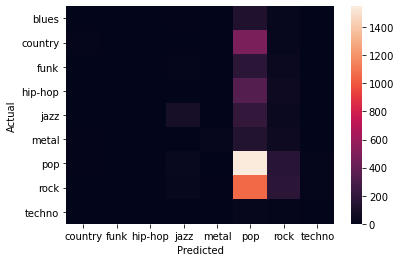

In [7]:
model = GaussianNB()
fit_summary(model, df)

## Upsampling classes

<AxesSubplot:ylabel='genre'>

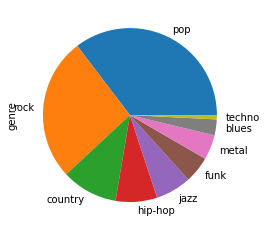

In [8]:
df.genre.value_counts().plot.pie()

In [9]:
df.genre.value_counts()

pop        7181
rock       5394
country    2117
hip-hop    1568
jazz       1347
funk       1001
metal       941
blues       596
techno      162
Name: genre, dtype: int64

Resample all y classes to the largest class, which in this case is pop with 7181 rows.

In [10]:
df_upsampled_list = []
largest_class_count = max(df.genre.value_counts())
for i in np.unique(df.genre):
    tmp = resample(
        df[df.genre == i],
        replace=True,
        n_samples=largest_class_count,
        random_state=0
    )
    df_upsampled_list.append(tmp)
df_upsampled = pd.concat(df_upsampled_list)
df_upsampled

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,...,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target,decade,genre
28096,Still Got The Blues,Gary Moore,spotify:track:0DnGfA1r8pAssJCuq4ojla,0.189,0.390,9,-14.497,0,0.0353,0.25700,...,0.1220,0.320,169.563,370867,3,54.48461,19,1,90,blues
7347,Honey Hush,Joe Turner,spotify:track:4Ji9WxwfjonQWd7C6wQduH,0.534,0.617,0,-9.099,1,0.0305,0.32100,...,0.1320,0.702,152.439,396160,4,36.05853,20,1,60,blues
13858,Shakey Ground,Phoebe Snow,spotify:track:3PcNsWAoCaoK63NIBdKj8n,0.704,0.825,9,-9.018,1,0.1300,0.29300,...,0.3160,0.835,96.351,257560,4,30.72867,10,1,70,blues
433,Celebrated Walkin' Blues,Taj Mahal,spotify:track:4oNnxT1kVOAcAYkt8gxXAS,0.509,0.341,7,-12.555,1,0.0654,0.51900,...,0.0867,0.515,130.023,531960,3,33.15027,26,0,60,blues
10550,Same Old Man,Karen Dalton,spotify:track:09RdGbLBERtmDDDwsInrGD,0.470,0.433,5,-8.759,1,0.0293,0.87100,...,0.1000,0.316,147.310,165093,4,64.24632,8,0,70,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25687,Get Ready For This,2 Unlimited,spotify:track:2P7L26IbmkrqxxtyP1CRRb,0.820,0.921,11,-8.019,0,0.0500,0.00291,...,0.0775,0.628,124.832,327587,4,30.00354,12,1,90,techno
26702,Yulquen,Autechre,spotify:track:3PGYnbU4HJDUw01PrME2pz,0.417,0.111,9,-31.491,0,0.0409,0.82600,...,0.1110,0.555,148.094,397000,5,235.06074,8,0,90,techno
23938,Twilight Zone,2 Unlimited,spotify:track:4UuhI4gOPHmv15xOnGIJ9x,0.700,0.990,3,-7.559,0,0.0499,0.08730,...,0.1510,0.770,127.884,248197,4,31.12469,15,1,90,techno
24482,Call Me,Le Click,spotify:track:2AKg3zhbkuVTd0LPOVNYSr,0.633,0.976,1,-3.475,0,0.0780,0.24900,...,0.3390,0.628,139.950,218947,3,64.08807,7,1,90,techno


Shuffle rows

In [11]:
df_upsampled = df_upsampled.sample(frac=1).reset_index(drop=True)
df_upsampled.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,...,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target,decade,genre
0,From the Flames,Memoriam,spotify:track:214N6e0ACMIFgI8C2ZseS7,0.525,0.602,6,-15.015,1,0.0466,0.00247,...,0.1040,0.146,80.057,339493,4,46.31089,12,0,10,metal
1,Little Red Rooster,Sam Cooke,spotify:track:1msykqPE0qoZig4nb9khI0,0.597,0.640,9,-7.719,1,0.0427,0.58800,...,0.5260,0.823,92.422,171827,4,52.82149,7,1,60,blues
2,Shut It Down,Pitbull Featuring Akon,spotify:track:6r9uMZ7NBaMO1ovylcJZI4,0.754,0.693,9,-6.483,0,0.0844,0.00590,...,0.0515,0.411,128.062,226093,4,39.51867,12,1,0,hip-hop
3,Morning Broadway,Keith Mansfield,spotify:track:6X0ufegIaeHxuShNKKmIGQ,0.763,0.616,0,-8.117,1,0.0365,0.54100,...,0.1130,0.645,94.490,125227,4,41.18817,6,0,60,jazz
4,El Paso,Marty Robbins,spotify:track:4f8hBeMXMvssn6HtFAtblo,0.654,0.452,2,-9.709,1,0.0300,0.83500,...,0.1600,0.691,106.662,259307,3,48.24968,11,1,60,country


<AxesSubplot:ylabel='genre'>

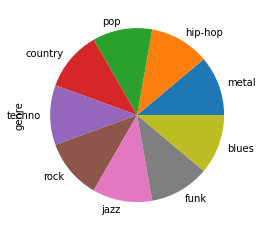

In [12]:
df_upsampled.genre.value_counts().plot.pie()

In [13]:
df_upsampled.genre.value_counts()

metal      7181
hip-hop    7181
pop        7181
country    7181
techno     7181
rock       7181
jazz       7181
funk       7181
blues      7181
Name: genre, dtype: int64

## Upsampled data

Model accuracy score: 0.2471840574328506
DummyClassifier accuracy score: 0.10824359450427033


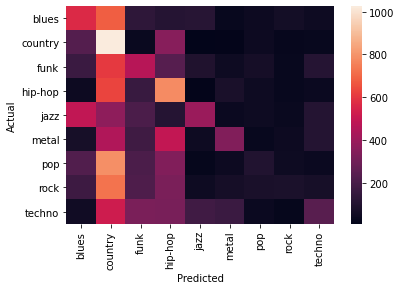

In [14]:
model = GaussianNB()
fit_summary(model, df_upsampled)

## Downsampling classes

In [15]:
df_downsampled_list = []
smallest_class_count = min(df.genre.value_counts())
for i in np.unique(df.genre):
    tmp = resample(
        df[df.genre == i],
        replace=False,
        n_samples=smallest_class_count,
        random_state=0
    )
    df_downsampled_list.append(tmp)
df_downsampled = pd.concat(df_downsampled_list)
df_upsampled = df_upsampled.sample(frac=1).reset_index(drop=True)
df_downsampled

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,...,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target,decade,genre
15456,Breaking Up Somebody's Home,Albert King,spotify:track:5SxTVDeCB3sK65lbyDpZiK,0.605,0.437,9,-7.496,0,0.0484,0.17900,...,0.1170,0.880,174.998,220547,4,29.59556,13,1,70,blues
4892,Down In The Valley,Solomon Burke,spotify:track:4X5USMkTYXSIcP3Wu6RPAj,0.707,0.486,1,-10.583,1,0.0297,0.83300,...,0.1100,0.965,106.193,154200,4,37.28990,8,1,60,blues
8171,My Dearest Darling,Etta James,spotify:track:5jcNL4DreI4z4XnTfsx9SQ,0.542,0.345,8,-7.870,1,0.0270,0.57400,...,0.3480,0.539,104.702,180667,3,34.83425,9,1,60,blues
9171,"Cole, Cooke & Redding",Wilson Pickett,spotify:track:5w6dCP5oEZskR2D9TU4Vxe,0.446,0.400,7,-16.993,1,0.0579,0.27200,...,0.0605,0.625,140.091,233267,4,45.17889,10,1,70,blues
3290,Mellow Down Easy,The Paul Butterfield Blues Band,spotify:track:3w7JOstC58U7VxTQcm7GIN,0.595,0.717,2,-8.908,1,0.0334,0.70800,...,0.2800,0.787,118.629,171040,4,53.65937,8,0,60,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12540,Rydeen,YELLOW MAGIC ORCHESTRA,spotify:track:2w2p6edOY7BNKVgb8qXd9a,0.552,0.905,2,-4.754,0,0.0397,0.00006,...,0.0641,0.912,142.777,267800,4,18.87659,12,0,70,techno
29856,Kernkraft 400,Zombie Nation,spotify:track:7g8cjrj0sXScNE727685JE,0.714,0.528,6,-8.789,1,0.0692,0.00415,...,0.0819,0.297,139.983,207267,4,35.14723,9,1,0,techno
26639,Enter,Cybotron,spotify:track:69hRGV0nTPd851z5O50dn5,0.674,0.708,1,-10.747,1,0.0640,0.03880,...,0.2730,0.694,110.434,337533,4,35.10824,19,0,90,techno
30972,Axel F,Crazy Frog,spotify:track:2Ea1iuiNtpR9BcFlQYRE5d,0.864,0.903,2,-3.258,1,0.0414,0.27000,...,0.0791,0.741,138.043,172695,4,35.51133,9,1,0,techno


In [16]:
df_downsampled.genre.value_counts()

blues      162
funk       162
jazz       162
country    162
techno     162
hip-hop    162
metal      162
pop        162
rock       162
Name: genre, dtype: int64

## Downsampled data

Model accuracy score: 0.23013698630136986
DummyClassifier accuracy score: 0.07671232876712329


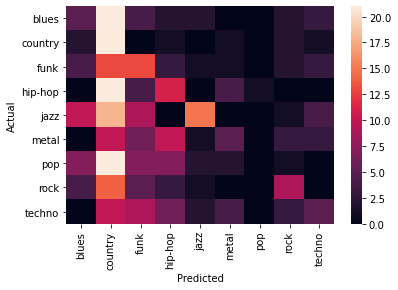

In [17]:
model = GaussianNB()
fit_summary(model, df_downsampled)

## Removing pop and rock

In [42]:
df_no_pop_rock = df.copy()
df_no_pop_rock = df_no_pop_rock[(df_no_pop_rock.genre != 'pop') & (df_no_pop_rock.genre != 'rock')]
df_no_pop_rock

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,...,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target,decade,genre
6,Samba De Uma Nota So (One Note Samba),Antônio Carlos Jobim,spotify:track:62eoocmGk59EMfuRcLBvUL,0.662,0.272,0,-18.883,1,0.0313,0.360000,...,0.0963,0.591,143.507,134360,4,47.82155,7,0,60,jazz
13,P.T. 109,Jimmy Dean,spotify:track:3vfNUZeVUiwWXwsEXjagqL,0.746,0.666,2,-10.408,1,0.1460,0.543000,...,0.0488,0.840,94.024,192427,4,78.59848,5,1,60,country
19,Let The Good Times Roll,Shirley & Lee,spotify:track:2ePDfIXoP2HmC1hfsujb2J,0.502,0.445,1,-9.562,1,0.0688,0.481000,...,0.0823,0.939,140.988,145653,4,18.90465,6,1,60,blues
20,I'm Here To Get My Baby Out Of Jail,The Everly Brothers,spotify:track:1E5cZzKmVgLLJcLI6HPbn4,0.480,0.225,3,-15.402,1,0.0310,0.780000,...,0.0877,0.580,128.017,217907,4,25.38117,13,1,60,country
32,Come Rain Or Come Shine,Ray Charles,spotify:track:2htH7r8oqqEwp3BB6oh2cU,0.357,0.216,3,-12.833,1,0.0343,0.767000,...,0.5310,0.283,119.570,222733,4,37.34774,10,1,60,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41068,My Obsession,Killswitch Engage,spotify:track:3x1Nt4T8cvlBCJtlmKDRAV,0.590,0.970,8,-3.815,1,0.0886,0.000047,...,0.3790,0.423,124.998,224760,4,32.70246,10,0,10,metal
41074,Metal Machine,U.D.O.,spotify:track:4MfBk2SvHdVjst7B1Kmcxg,0.565,0.853,2,-6.008,1,0.0289,0.000530,...,0.3460,0.501,110.008,286093,4,47.76517,15,0,10,metal
41079,Whiskey In My Water,Tyler Farr,spotify:track:5E4CJfa6yZNGSKVFSUgaBt,0.526,0.872,7,-5.079,1,0.0428,0.245000,...,0.2430,0.583,153.929,188147,4,17.64029,9,1,10,country
41089,Cake,Flo Rida & 99 Percent,spotify:track:6t2ubAB4iSYOuIpRAOGd4t,0.786,0.854,2,-4.247,1,0.0523,0.072900,...,0.1790,0.687,105.078,157165,4,83.47828,6,1,10,hip-hop


<AxesSubplot:ylabel='genre'>

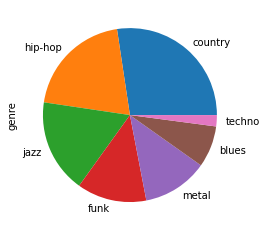

In [43]:
df_no_pop_rock.genre.value_counts().plot.pie()

## Combining smaller classes to other

In [35]:
df_combined = df.copy()
df_combined.loc[(df_combined.genre != 'pop') & (df_combined.genre != 'rock'), 'genre'] = 'other'
df_combined

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,...,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target,decade,genre
1,Initials B.B.,Serge Gainsbourg,spotify:track:5hjsmSnUefdUqzsDogisiX,0.498,0.505,3,-12.475,1,0.0337,0.0180,...,0.1760,0.797,101.801,213613,4,48.82510,10,0,60,pop
6,Samba De Uma Nota So (One Note Samba),Antônio Carlos Jobim,spotify:track:62eoocmGk59EMfuRcLBvUL,0.662,0.272,0,-18.883,1,0.0313,0.3600,...,0.0963,0.591,143.507,134360,4,47.82155,7,0,60,other
9,I Can Hear Music,The Beach Boys,spotify:track:1hcMfYTsRTC4hIKbfosxjz,0.511,0.603,2,-7.637,1,0.0280,0.0385,...,0.1420,0.685,128.336,157293,4,43.36534,9,1,60,pop
11,Ride Away,Roy Orbison,spotify:track:1nxSCulSg5AtmExqgHPPC0,0.520,0.411,9,-12.411,1,0.0315,0.7860,...,0.1460,0.350,120.290,207573,4,37.54527,9,1,60,pop
13,P.T. 109,Jimmy Dean,spotify:track:3vfNUZeVUiwWXwsEXjagqL,0.746,0.666,2,-10.408,1,0.1460,0.5430,...,0.0488,0.840,94.024,192427,4,78.59848,5,1,60,other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41097,What Now,Rihanna,spotify:track:0aUWfpD3PlSv3FTTKcT2rN,0.402,0.696,8,-4.799,0,0.0448,0.0476,...,0.6280,0.227,180.158,243093,3,31.53643,11,1,10,pop
41098,Tear In My Heart,twenty one pilots,spotify:track:3bnVBN67NBEzedqQuWrpP4,0.655,0.632,2,-4.802,1,0.0489,0.0189,...,0.0722,0.447,120.113,188493,4,51.52804,8,1,10,pop
41099,Sweater Weather,The Neighbourhood,spotify:track:2QjOHCTQ1Jl3zawyYOpxh6,0.612,0.807,10,-2.810,1,0.0336,0.0495,...,0.1010,0.398,124.053,240400,4,91.20552,7,1,10,pop
41103,Teenage Dream,Katy Perry,spotify:track:55qBw1900pZKfXJ6Q9A2Lc,0.719,0.804,10,-4.581,1,0.0355,0.0132,...,0.1390,0.605,119.999,227760,4,20.73371,7,1,10,pop


<AxesSubplot:ylabel='genre'>

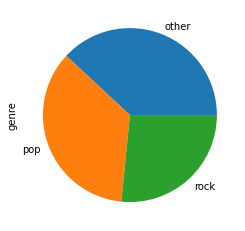

In [36]:
df_combined.genre.value_counts().plot.pie()

In [37]:
df_combined.genre.value_counts()

other    7732
pop      7181
rock     5394
Name: genre, dtype: int64

## Combined data

Model accuracy score: 0.41028166239905456
DummyClassifier accuracy score: 0.3744337207012015


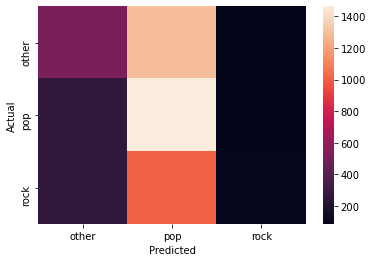

In [38]:
model = GaussianNB()
fit_summary(model, df_combined)

## Conclusion